#Hand Written Digital Prediction - Classification Analysis

In [4]:
import pandas as pd



In [5]:
import numpy as np


In [6]:
import matplotlib.pyplot as plt


#import data








In [7]:
from sklearn.datasets import load_digits

In [8]:
df=load_digits()

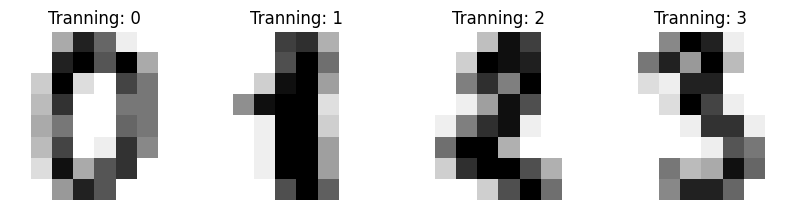

In [9]:
_,axes = plt.subplots(nrows=1, ncols=4 , figsize = (10,3))
for ax, image, label in zip(axes, df.images ,df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation = "nearest")
  ax.set_title("Tranning: %i" % label)

# Data Processing

flattern image



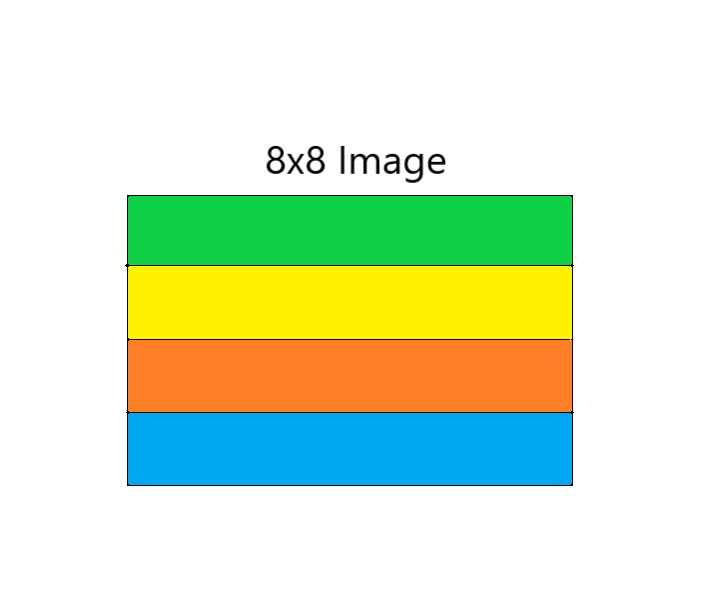

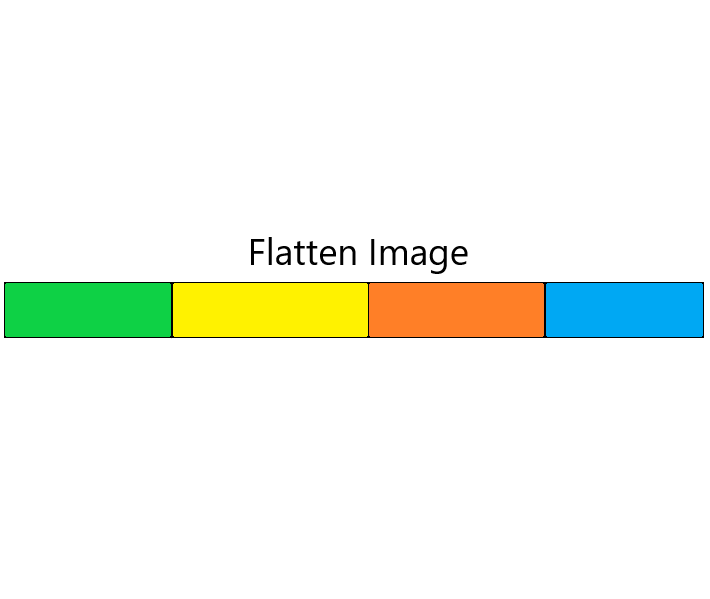

In [10]:
df.images.shape

(1797, 8, 8)

In [11]:
df.images[0]


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [12]:
df.images[0].shape


(8, 8)

In [13]:
len(df.images)

1797

In [15]:
n_samples = len(df.images)
data = df.images.reshape(n_samples, -1)

In [16]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [17]:
data[0].shape

(64,)

In [18]:
data.shape

(1797, 64)

#Scaling image data


In [19]:
data.min()

0.0

In [20]:
data.max()

16.0

In [21]:
data = data/16

In [22]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

#Train Test Split data


In [23]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

#Random Forest Model

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf= RandomForestClassifier()

In [31]:
rf.fit(X_train, y_train)

RandomForestClassifier()

#Predict Test Data

In [32]:
y_pred = rf.predict(X_test)

In [33]:
y_pred

array([1, 9, 4, 6, 4, 9, 3, 2, 3, 6, 7, 9, 1, 8, 9, 5, 6, 8, 6, 4, 2, 2,
       6, 3, 0, 5, 4, 5, 2, 2, 5, 3, 2, 5, 5, 0, 4, 6, 9, 6, 0, 9, 5, 8,
       0, 0, 6, 5, 2, 0, 6, 3, 2, 4, 0, 7, 3, 9, 8, 1, 2, 5, 1, 5, 0, 2,
       6, 4, 8, 1, 6, 5, 1, 0, 0, 4, 9, 8, 0, 0, 2, 4, 5, 7, 5, 5, 6, 0,
       8, 6, 5, 9, 6, 9, 6, 4, 0, 1, 2, 4, 0, 6, 1, 4, 7, 5, 3, 5, 2, 5,
       7, 0, 3, 7, 7, 5, 1, 5, 1, 3, 4, 1, 2, 8, 0, 8, 9, 7, 9, 7, 1, 7,
       6, 5, 9, 1, 2, 1, 5, 3, 7, 4, 1, 1, 1, 7, 7, 0, 4, 5, 1, 2, 1, 7,
       2, 2, 3, 6, 3, 2, 3, 6, 4, 0, 6, 8, 5, 9, 8, 6, 9, 0, 8, 6, 9, 6,
       5, 1, 4, 1, 7, 5, 1, 0, 1, 6, 3, 8, 6, 3, 9, 6, 1, 1, 3, 9, 0, 9,
       2, 0, 0, 9, 4, 2, 4, 8, 4, 5, 4, 5, 9, 6, 5, 0, 3, 7, 0, 3, 3, 1,
       0, 1, 7, 4, 2, 2, 8, 9, 8, 2, 8, 5, 1, 3, 9, 7, 3, 2, 9, 5, 6, 7,
       7, 4, 5, 0, 4, 7, 1, 3, 3, 0, 5, 8, 2, 8, 4, 1, 0, 4, 6, 8, 9, 1,
       2, 9, 3, 3, 3, 1, 1, 0, 3, 3, 1, 3, 1, 1, 4, 1, 1, 7, 7, 4, 2, 3,
       0, 7, 6, 7, 2, 1, 7, 4, 8, 1, 3, 0, 2, 1, 8,

In [85]:
y_test

array([1, 9, 4, 6, 4, 9, 9, 2, 3, 6, 7, 9, 8, 8, 9, 5, 6, 8, 6, 4, 2, 2,
       6, 3, 0, 5, 4, 5, 2, 2, 5, 3, 2, 5, 5, 0, 4, 6, 9, 6, 0, 9, 5, 8,
       0, 0, 6, 5, 2, 0, 6, 3, 2, 4, 0, 7, 3, 9, 8, 1, 1, 5, 1, 5, 0, 2,
       6, 4, 8, 1, 6, 3, 1, 0, 0, 4, 9, 8, 0, 0, 2, 4, 5, 7, 5, 5, 6, 0,
       8, 6, 5, 9, 6, 9, 6, 4, 0, 1, 2, 4, 0, 6, 1, 4, 7, 5, 3, 5, 2, 5,
       7, 0, 3, 7, 7, 5, 8, 5, 1, 3, 4, 1, 2, 8, 0, 8, 9, 7, 9, 7, 1, 7,
       6, 5, 9, 1, 2, 1, 5, 3, 7, 4, 1, 1, 1, 7, 7, 0, 4, 5, 1, 2, 1, 7,
       2, 2, 3, 6, 3, 2, 3, 6, 4, 0, 6, 8, 5, 9, 8, 6, 9, 0, 8, 6, 9, 6,
       3, 1, 4, 1, 7, 5, 1, 0, 1, 6, 3, 8, 6, 3, 9, 6, 1, 1, 3, 9, 0, 9,
       2, 0, 0, 9, 4, 2, 4, 8, 4, 5, 4, 5, 9, 6, 5, 0, 3, 7, 0, 3, 3, 1,
       0, 1, 7, 4, 2, 2, 8, 9, 8, 2, 8, 5, 1, 3, 9, 7, 3, 2, 9, 5, 6, 7,
       7, 4, 5, 0, 4, 7, 1, 3, 3, 0, 5, 8, 2, 8, 4, 2, 0, 4, 6, 8, 9, 1,
       2, 9, 3, 3, 3, 1, 1, 0, 3, 3, 8, 3, 1, 1, 4, 1, 1, 7, 7, 4, 2, 3,
       0, 7, 6, 7, 2, 1, 7, 4, 8, 1, 3, 0, 2, 1, 8,

#Model Accuracy

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
confusion_matrix(y_test, y_pred)

array([[54,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 57,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 52,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 61,  0,  2,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 55,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 48,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 55,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 57,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 40,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 47]])

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        55
           1       0.92      0.98      0.95        58
           2       0.98      0.98      0.98        53
           3       0.98      0.94      0.96        65
           4       0.98      1.00      0.99        55
           5       0.96      0.98      0.97        49
           6       1.00      1.00      1.00        55
           7       1.00      1.00      1.00        57
           8       0.95      0.91      0.93        44
           9       0.96      0.96      0.96        49

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



In [76]:
import cv2

# img = cv2.imread('/content/download (1).png')

img = cv2.imdecode(np.fromfile('/content/7.png', dtype=np.uint8), cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# n_samples = len(img)
# data = img.reshape(n_samples, -1)

img = img/255
img = img.reshape(1, -1)

y_pred = rf.predict(img)
# y_pred


y_pred[0]

6

In [77]:
from IPython.display import Image
Image(filename='/content/7.png', height=100, width=100)